In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


In [2]:
from google.colab import files
uploaded = files.upload()

!unzip 03-minimized-data.zip


Streaming output truncated to the last 5000 lines.
  inflating: 03-minimized-data/Adminai/11367_body.txt  
  inflating: 03-minimized-data/Adminai/12188_body.txt  
  inflating: 03-minimized-data/Adminai/10090_body.txt  
  inflating: 03-minimized-data/Adminai/10312_body.txt  
  inflating: 03-minimized-data/Adminai/14024_body.txt  
  inflating: 03-minimized-data/Adminai/13171_body.txt  
  inflating: 03-minimized-data/Adminai/14514_body.txt  
  inflating: 03-minimized-data/Adminai/15141_body.txt  
  inflating: 03-minimized-data/Adminai/12348_body.txt  
  inflating: 03-minimized-data/Adminai/12799_body.txt  
  inflating: 03-minimized-data/Adminai/14994_body.txt  
  inflating: 03-minimized-data/Adminai/12035_body.txt  
  inflating: 03-minimized-data/Adminai/12595_body.txt  
  inflating: 03-minimized-data/Adminai/10086_body.txt  
  inflating: 03-minimized-data/Adminai/13928_body.txt  
  inflating: 03-minimized-data/Adminai/10655_body.txt  
  inflating: 03-minimized-data/Adminai/12264_body.txt

In [3]:
dataset_dir = "03-minimized-data/"

In [4]:
os.listdir(dataset_dir)

['Cloud',
 'Klasių kompiuteriai',
 'Programuotojai',
 'Tinklas',
 'Tinklapiai',
 'Paraiškos',
 'Saugumo pažeidimai',
 'Adminai',
 'ITAPC']

In [5]:
train_dir = dataset_dir
os.listdir(train_dir)

['Cloud',
 'Klasių kompiuteriai',
 'Programuotojai',
 'Tinklas',
 'Tinklapiai',
 'Paraiškos',
 'Saugumo pažeidimai',
 'Adminai',
 'ITAPC']

In [6]:
sample_file = os.path.join(train_dir, 'Adminai/10009_body.txt')
with open(sample_file) as f:
  print(f.read())

<div dir="ltr"><div>Laba diena, </div><div>Koks eduroam prisijungimo Domain? Ačiū.</div><div><br />-- <br /><div class="gmail_signature" dir="ltr" data-smartmail="gmail_signature"><div dir="ltr"><div><br /><span style="color: #666666;">Pagarbiai<br />Vladimiras  </span></div></div></div></div></div>


In [7]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    '03-minimized-data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 6569 files belonging to 9 classes.
Using 5256 files for training.


In [8]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'<pre>\r\nFrom: Laura Misi\xc5\xabnait\xc4\x97 <laura.misiunaite@mif.vu.lt>\r\nTo: "svetaine@mif.vu.lt" <svetaine@mif.vu.lt>\r\nDate: Thu, 04 Mar 2021 12:49:04 +0000\r\n</pre>1.       http://mif.vu.lt/lt3/stojantiesiems/magistrant%C5%ABros-studijos/modeliavimas-ir-duomen%C5%B3-analiz%C4%97#reikalavimai-stojantiesiems\r\n\r\nTrinti visk\xc4\x85, kas yra \xc5\xa1ioje skiltyje ir para\xc5\xa1yti\r\n\r\n\xc4\xae \xc5\xa1i\xc4\x85 studij\xc5\xb3 program\xc4\x85 yra priimami asmenys, baig\xc4\x99 pirmosios pakopos universitetines vis\xc5\xb3 sri\xc4\x8di\xc5\xb3 (kryp\xc4\x8di\xc5\xb3) studijas \xe2\x80\x93 j\xc4\x85 gali rinktis matematikos, ekonomikos, statistikos, informatikos, fizikos, o taip pat kit\xc5\xb3 kryp\xc4\x8di\xc5\xb3 bakalaurai, siekiantys \xc4\xafsisavinti \xc5\xa1iuolaikin\xc4\x99 ekonometrij\xc4\x85 ir duomen\xc5\xb3 analiz\xc4\x97s metodus ir turintys s\xc4\x97kmingam programos baigimui reikaling\xc4\x85 bazin\xc4\xaf matematin\xc4\xaf-statistin\xc4\xaf, ekonomin

In [9]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])
print("Label 3 corresponds to", raw_train_ds.class_names[3])
print("Label 4 corresponds to", raw_train_ds.class_names[4])
print("Label 5 corresponds to", raw_train_ds.class_names[5])
print("Label 6 corresponds to", raw_train_ds.class_names[6])
print("Label 7 corresponds to", raw_train_ds.class_names[7])

Label 0 corresponds to Adminai
Label 1 corresponds to Cloud
Label 2 corresponds to ITAPC
Label 3 corresponds to Klasių kompiuteriai
Label 4 corresponds to Paraiškos
Label 5 corresponds to Programuotojai
Label 6 corresponds to Saugumo pažeidimai
Label 7 corresponds to Tinklapiai


In [10]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    '03-minimized-data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 6569 files belonging to 9 classes.
Using 1313 files for validation.


In [11]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    '03-minimized-data',
    batch_size=batch_size)

Found 6569 files belonging to 9 classes.


In [12]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [13]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [14]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [15]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  # Convert label to one-hot encoding
  label = tf.one_hot(label, depth=8) # Assuming 8 classes
  return vectorize_layer(text), label

In [16]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'<div class="WordSection1">\n<p class="MsoNormal"><span lang="LT">Sveiki,</span></p>\n<p class="MsoNormal"><span lang="LT"></span></p>\n<p class="MsoNormal"><span lang="LT">pra\xc5\xa1au \xc4\xaf MIF puslap\xc4\xaf \xc4\xafkelti naujien\xc4\x85. Pavadinimas:\n</span><b>D\xc4\x97stymo vizitui \xc4\xaf Seut\xc4\x85 vyk\xc4\x99s MIF d\xc4\x97stytojas A. Raudys dalijasi patirtimi</b>. Pridedu pagrindin\xc4\x99 nuotrauk\xc4\x85, dar kelios fotografijos yra tekste. Visi atvaizdai i\xc5\xa1 asmeninio A. Raud\xc5\xbeio archyvo.</p>\n<p class="MsoNormal"></p>\n<p class="MsoNormal">D\xc4\x97koju.</p>\n<p class="MsoNormal"></p>\n<p class="MsoNormal">Gra\xc5\xbeios dienos,</p>\n<p class="MsoNormal">Agn\xc4\x97<span lang="LT"></span></p>\n<p class="MsoNormal"><span lang="LT"></span></p>\n</div>\n\nPrisegta rinkmena sugadinta: msg_1_svetaine-mif-naujiena.EML (text/plain)', shape=(), dtype=string)
Label Tinklapiai
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
ar

In [17]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  spanfontspanfontdiv
 313 --->  00001pt
Vocabulary size: 10000


In [18]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
embedding_dim = 16

In [21]:
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(8, activation='softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6064 - loss: 1.5003 - val_accuracy: 0.6725 - val_loss: 1.0877
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 1.1328 - val_accuracy: 0.6763 - val_loss: 0.9910
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 1.0446 - val_accuracy: 0.6938 - val_loss: 0.9167
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.9665 - val_accuracy: 0.7251 - val_loss: 0.8398
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6926 - loss: 0.8840 - val_accuracy: 0.7449 - val_loss: 0.7747
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.8223 - val_accuracy: 0.7555 - val_loss: 0.7188
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.7642 - val_accuracy: 0.7791 - val_loss: 0.6720
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7703 - loss: 0.7099 - val_accuracy: 0

In [24]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8293 - loss: 0.5669
Loss:  0.5749475955963135
Accuracy:  0.8302633762359619


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

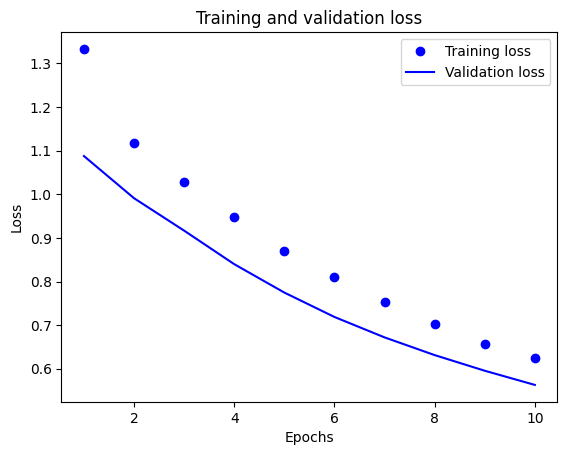

In [26]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

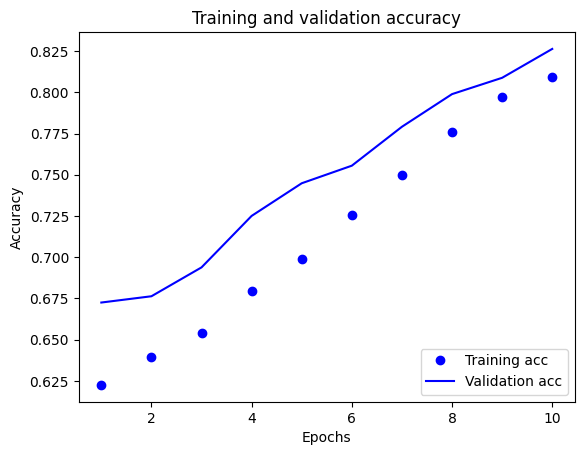

In [27]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [28]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('softmax')
])

export_model.layers[1].set_weights(model.get_weights())

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
# test_ds = raw_test_ds.map(vectorize_text)
metrics = export_model.evaluate(raw_test_ds, return_dict=True)
print(metrics)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 8)

In [ ]:
examples = tf.constant([
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
])

export_model.predict(examples)